<a href="https://colab.research.google.com/github/awaisfarooqchaudhry/IB9AU-GenerativeAI-2026/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

print("Please upload your CSV file:")
uploaded = files.upload()

if uploaded:
    # Assuming the user uploads a single file, take the first filename
    filename = next(iter(uploaded))
    print(f"File '{filename}' uploaded successfully.")

    try:
        df = pd.read_csv(filename, low_memory=False)
        print("\nFirst 5 rows of the DataFrame:")
        print(df.head())
        print("\nDataFrame Info:")
        df.info()
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        print("Please ensure the uploaded file is a valid CSV format.")
else:
    print("No file was uploaded.")

Please upload your CSV file:


Saving fakenews.csv to fakenews (3).csv
File 'fakenews (3).csv' uploaded successfully.

First 5 rows of the DataFrame:
                                                text label Unnamed: 2  \
0  Get the latest from TODAY Sign up for our news...     1        NaN   
1  2d  Conan On The Funeral Trump Will Be Invited...     1        NaN   
2  It’s safe to say that Instagram Stories has fa...     0        NaN   
3  Much like a certain Amazon goddess with a lass...     0        NaN   
4  At a time when the perfect outfit is just one ...     0        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9  .

# Task
Analyze the `fakenews (3).csv` dataset to compare sentiment and identify topics in text messages, distinguishing between spam and normal messages using the 'label' column.

## Clean Dataset

### Subtask:
Identify and remove columns that are entirely or almost entirely filled with NaN values (e.g., the 'Unnamed' columns), as well as any rows that might be completely empty or irrelevant, to prepare the data for analysis.


**Reasoning**:
First, I'll calculate the percentage of missing values for each column in the DataFrame to identify columns that are mostly empty.



In [ ]:
missing_percentages = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:")
print(missing_percentages[missing_percentages > 0].sort_values(ascending=False))

Percentage of missing values per column:
Unnamed: 345    99.979642
Unnamed: 344    99.979642
Unnamed: 343    99.979642
Unnamed: 342    99.979642
Unnamed: 341    99.979642
                  ...    
Unnamed: 5      99.857492
Unnamed: 4      99.857492
Unnamed: 3      99.857492
Unnamed: 2      99.857492
label            0.162866
Length: 426, dtype: float64


**Reasoning**:
Based on the calculated missing percentages, I will now identify and drop columns that have more than 90% missing values, as these are likely the 'Unnamed' columns that are irrelevant.



In [ ]:
threshold = 90
columns_to_drop = missing_percentages[missing_percentages > threshold].index
df_cleaned = df.drop(columns=columns_to_drop)
print(f"Dropped {len(columns_to_drop)} columns with more than {threshold}% missing values.")
print("New DataFrame Info after dropping columns:")
df_cleaned.info()

Dropped 425 columns with more than 90% missing values.
New DataFrame Info after dropping columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4912 entries, 0 to 4911
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4912 non-null   object
 1   label   4904 non-null   object
dtypes: object(2)
memory usage: 76.9+ KB


**Reasoning**:
Now that the columns with excessive missing values have been removed, I will proceed to remove any rows that still contain missing values, specifically in the 'label' column, as these rows would be irrelevant for analysis.



In [ ]:
df_cleaned.dropna(subset=['label'], inplace=True)
print("DataFrame Info after dropping rows with missing 'label' values:")
df_cleaned.info()
print("\nFirst 5 rows of the cleaned DataFrame:")
print(df_cleaned.head())

DataFrame Info after dropping rows with missing 'label' values:
<class 'pandas.core.frame.DataFrame'>
Index: 4904 entries, 0 to 4911
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4904 non-null   object
 1   label   4904 non-null   object
dtypes: object(2)
memory usage: 114.9+ KB

First 5 rows of the cleaned DataFrame:
                                                text label
0  Get the latest from TODAY Sign up for our news...     1
1  2d  Conan On The Funeral Trump Will Be Invited...     1
2  It’s safe to say that Instagram Stories has fa...     0
3  Much like a certain Amazon goddess with a lass...     0
4  At a time when the perfect outfit is just one ...     0


## Sentiment Analysis

### Subtask:
Perform sentiment analysis on the 'text' column of the `df_cleaned` DataFrame. Assign sentiment scores to each text entry and then compare the average sentiment between messages labeled as '0' and '1' using the 'label' column.


**Reasoning**:
First, I'll convert the 'label' column to a numeric type, coercing any errors to NaN and then dropping those rows. This ensures that the label column is ready for numerical operations and comparison with sentiment scores.



In [ ]:
df_cleaned['label'] = pd.to_numeric(df_cleaned['label'], errors='coerce')
df_cleaned.dropna(subset=['label'], inplace=True)
df_cleaned['label'] = df_cleaned['label'].astype(int)
print("Label column converted to numeric and rows with non-numeric labels dropped.")
print(df_cleaned['label'].value_counts())

Label column converted to numeric and rows with non-numeric labels dropped.
label
0    2925
1    1971
Name: count, dtype: int64


**Reasoning**:
Now that the 'label' column is correctly formatted, I will download the 'vader_lexicon' necessary for sentiment analysis, and then import the `SentimentIntensityAnalyzer` from `nltk.sentiment.vader` to prepare for sentiment score calculation.



In [ ]:
import nltk
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

print("NLTK vader_lexicon downloaded and SentimentIntensityAnalyzer imported.")

NLTK vader_lexicon downloaded and SentimentIntensityAnalyzer imported.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


**Reasoning**:
Now that the `SentimentIntensityAnalyzer` is imported, I will initialize it and then define a function to extract the compound sentiment score. I will apply this function to the 'text' column of the `df_cleaned` DataFrame to create a new 'sentiment_score' column, as per the next step in the subtask.



In [ ]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

df_cleaned['sentiment_score'] = df_cleaned['text'].apply(get_sentiment_score)
print("Sentiment scores calculated and added to 'sentiment_score' column.")
print("First 5 rows with new sentiment_score:")
print(df_cleaned.head())

Sentiment scores calculated and added to 'sentiment_score' column.
First 5 rows with new sentiment_score:
                                                text  label  sentiment_score
0  Get the latest from TODAY Sign up for our news...      1           0.1531
1  2d  Conan On The Funeral Trump Will Be Invited...      1          -0.3612
2  It’s safe to say that Instagram Stories has fa...      0           0.9879
3  Much like a certain Amazon goddess with a lass...      0           0.9994
4  At a time when the perfect outfit is just one ...      0           0.7234


**Reasoning**:
Now that sentiment scores have been calculated, I will group the `df_cleaned` DataFrame by the 'label' column and compute the average 'sentiment_score' for each group, as instructed, to compare the sentiment between different message labels.



In [ ]:
average_sentiment = df_cleaned.groupby('label')['sentiment_score'].mean()
print("Average sentiment score by label:")
print(average_sentiment)

Average sentiment score by label:
label
0    0.532530
1    0.467432
Name: sentiment_score, dtype: float64


## Topic Modeling Preprocessing

### Subtask:
Prepare the 'text' data for topic modeling, including tokenization, removing stopwords, and lemmatization, to create a corpus suitable for topic extraction.


**Reasoning**:
First, I'll import the necessary NLTK modules and download the required 'punkt', 'wordnet', and 'stopwords' data, as these are essential for tokenization, lemmatization, and stopword removal in the text preprocessing step.



In [ ]:
import nltk
import string

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

print("NLTK resources (punkt, wordnet, stopwords) downloaded and necessary modules imported.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK resources (punkt, wordnet, stopwords) downloaded and necessary modules imported.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Reasoning**:
Now that the necessary NLTK resources are imported, I will initialize the `WordNetLemmatizer` and define a preprocessing function. This function will convert text to lowercase, tokenize it, remove punctuation and stopwords, and lemmatize words before joining them back into a string, as per the instructions for preparing data for topic modeling.



In [ ]:
import nltk
import string

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt_tab') # Added this line
except LookupError:
    nltk.download('punkt_tab') # Added this line

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

print("NLTK resources (punkt, wordnet, stopwords, punkt_tab) downloaded and necessary modules imported.")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLTK resources (punkt, wordnet, stopwords, punkt_tab) downloaded and necessary modules imported.


**Reasoning**:
Since the necessary NLTK resources, including 'punkt_tab', have now been successfully downloaded and imported in the previous step, I will re-execute the code to initialize the `WordNetLemmatizer` and define the text preprocessing function. Then, I will apply this function to the 'text' column to create the `preprocessed_text` column, which should now run without errors.



In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()  # Ensure text is string and convert to lowercase
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation and non-alphabetic
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

df_cleaned['preprocessed_text'] = df_cleaned['text'].apply(preprocess_text)
print("Text preprocessing complete. New 'preprocessed_text' column created.")
print("First 5 rows with preprocessed text:")
print(df_cleaned[['text', 'preprocessed_text']].head())

Text preprocessing complete. New 'preprocessed_text' column created.
First 5 rows with preprocessed text:
                                                text  \
0  Get the latest from TODAY Sign up for our news...   
1  2d  Conan On The Funeral Trump Will Be Invited...   
2  It’s safe to say that Instagram Stories has fa...   
3  Much like a certain Amazon goddess with a lass...   
4  At a time when the perfect outfit is just one ...   

                                   preprocessed_text  
0  get latest today sign newsletter one ever trul...  
1               conan funeral trump invited conan tb  
2  safe say instagram story far surpassed competi...  
3  much like certain amazon goddess lasso height ...  
4  time perfect outfit one click away high demand...  


## Determine Optimal Topics and Topic Modeling

### Subtask:
Apply a topic modeling technique to the preprocessed 'text' data, determine an appropriate number of topics using coherence scores, and then perform the topic modeling to extract the main themes.


**Reasoning**:
First, I'll import the necessary scikit-learn and gensim modules for topic modeling, and ensure that the 'averaged_perceptron_tagger' NLTK resource is downloaded, as these are prerequisites for the subsequent topic modeling steps.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Note: LdaModel, CoherenceModel, and Dictionary will be imported as needed from gensim.
# For now, just import what's directly required for the check.

import nltk
try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger')

print("Required libraries imported and 'averaged_perceptron_tagger' resource checked/downloaded.")

Required libraries imported and 'averaged_perceptron_tagger' resource checked/downloaded.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


**Reasoning**:
Now that the necessary NLTK resources are available, I will proceed with topic modeling by first tokenizing the preprocessed text, creating a Document-Term Matrix (DTM) using `CountVectorizer`, and then preparing the data for Gensim's coherence model. I will iterate through a range of topic numbers, train an `sklearn` LDA model for each, extract its topic-word distributions, and calculate the coherence score using `gensim.models.CoherenceModel` to determine the optimal number of topics.



In [ ]:
import sys
!{sys.executable} -m pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 32.2 MB/s eta 0:00:00


**Reasoning**:
Since the `gensim` library has been successfully installed, I will re-execute the code block that performs tokenization, DTM creation, Gensim dictionary and corpus creation, and then iterates through a range of topic numbers to train LDA models and calculate their coherence scores. This should now run without the `ModuleNotFoundError`.



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import nltk
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Step 4: Create a new column in df_cleaned called tokenized_text
df_cleaned['tokenized_text'] = df_cleaned['preprocessed_text'].apply(lambda x: str(x).split())
print("Created 'tokenized_text' column.")

# Step 5: Initialize a CountVectorizer object and create DTM
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df_cleaned['preprocessed_text'])
feature_names = vectorizer.get_feature_names_out()
print("CountVectorizer fitted and DTM created.")

# Step 6: Create a gensim.corpora.Dictionary object
gensim_dictionary = Dictionary(df_cleaned['tokenized_text'])
print("Gensim Dictionary created.")

# Step 7: Convert the dtm into a gensim corpus format (list of (word_id, count) tuples)
gensim_corpus = [gensim_dictionary.doc2bow(text) for text in df_cleaned['tokenized_text']]
print("Gensim Corpus created.")

# Step 8: Define a range of topic numbers to evaluate
topic_range = range(2, 11)  # Evaluate from 2 to 10 topics

# Step 9: Initialize an empty list to store coherence scores
coherence_scores = []

# Step 10: Iterate through the defined range of topic numbers
print("Starting coherence score calculation...")
for num_topics in topic_range:
    print(f"  Evaluating {num_topics} topics...")
    # a. Initialize and train an LatentDirichletAllocation model from sklearn
    sklearn_lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42, n_jobs=-1)
    sklearn_lda_model.fit(dtm)

    # b. Extract topic-word distributions from the trained sklearn LDA model
    # This part converts sklearn's topic components into a list of word lists for gensim CoherenceModel
    sklearn_topics_words = []
    for topic_weights in sklearn_lda_model.components_:
        top_features_ind = topic_weights.argsort()[:-10 - 1:-1] # Get top 10 words
        top_features = [feature_names[i] for i in top_features_ind]
        sklearn_topics_words.append(top_features)

    # c. Initialize a gensim.models.CoherenceModel
    coherence_model_lda = CoherenceModel(topics=sklearn_topics_words,
                                         dictionary=gensim_dictionary,
                                         corpus=gensim_corpus,
                                         texts=df_cleaned['tokenized_text'],
                                         coherence='c_v')

    # d. Calculate the coherence score and append it to the list
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"  Coherence score for {num_topics} topics: {coherence_score:.4f}")

print("Coherence score calculation complete.")

# Step 11: Store the topic numbers and their corresponding coherence scores in a Pandas DataFrame
coherence_df = pd.DataFrame({'Number of Topics': list(topic_range), 'Coherence Score': coherence_scores})
print("\nCoherence Scores per number of topics:")
print(coherence_df)


Created 'tokenized_text' column.
CountVectorizer fitted and DTM created.
Gensim Dictionary created.
Gensim Corpus created.
Starting coherence score calculation...
  Evaluating 2 topics...
  Coherence score for 2 topics: 0.3685
  Evaluating 3 topics...
  Coherence score for 3 topics: 0.4464
  Evaluating 4 topics...
  Coherence score for 4 topics: 0.5108
  Evaluating 5 topics...
  Coherence score for 5 topics: 0.5305
  Evaluating 6 topics...
  Coherence score for 6 topics: 0.5334
  Evaluating 7 topics...
  Coherence score for 7 topics: 0.5668
  Evaluating 8 topics...
  Coherence score for 8 topics: 0.5780
  Evaluating 9 topics...
  Coherence score for 9 topics: 0.5888
  Evaluating 10 topics...
  Coherence score for 10 topics: 0.5543
Coherence score calculation complete.

Coherence Scores per number of topics:
   Number of Topics  Coherence Score
0                 2         0.368462
1                 3         0.446368
2                 4         0.510820
3                 5         0.530

**Reasoning**:
Now that the coherence scores have been calculated for different numbers of topics, I will identify the optimal number of topics by finding the maximum coherence score. After identifying the optimal number, I will initialize and train a `LatentDirichletAllocation` model with this optimal number of topics using the `dtm` (Document-Term Matrix). Finally, I will print the top words for each of the identified topics to understand the main themes.



In [ ]:
optimal_num_topics = coherence_df.loc[coherence_df['Coherence Score'].idxmax(), 'Number of Topics']
print(f"Optimal number of topics based on coherence score: {optimal_num_topics}")

# Train the final LDA model with the optimal number of topics
lda_model = LatentDirichletAllocation(n_components=optimal_num_topics, random_state=42, n_jobs=-1)
lda_model.fit(dtm)

# Function to display topics and their top words
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

print(f"\nTopics and their top {10} words for {optimal_num_topics} topics:")
display_topics(lda_model, feature_names, 10)

Optimal number of topics based on coherence score: 9

Topics and their top 10 words for 9 topics:
Topic 1:
season series film episode movie new character role cast time
Topic 2:
film robert actress role year award million woman edit appeared
Topic 3:
harry prince royal meghan markle wedding queen image kate william
Topic 4:
said like time year love say life know people told
Topic 5:
trump said president people time state year new house child
Topic 6:
said weinstein woman sexual year say new allegation told police
Topic 7:
award best year winner edit holmes live team new host
Topic 8:
song album selena justin music singer bieber gomez love new
Topic 9:
kardashian kim jenner baby kylie photo family west kanye child


## Analyze Topic Distribution by Label

### Subtask:
Analyze how the identified topics are distributed across messages labeled as '0' and '1'.


**Reasoning**:
I will transform the Document-Term Matrix (dtm) using the trained lda_model to get the topic distribution for each document and then add these topic distributions as new columns to the df_cleaned DataFrame, following the first two instructions of the subtask.



In [ ]:
topic_distribution = lda_model.transform(dtm)

# Create new columns for topic probabilities
for i in range(optimal_num_topics):
    df_cleaned[f'topic_{i}_prob'] = topic_distribution[:, i]

print("Topic distributions added to df_cleaned.")
print("First 5 rows with topic probabilities:")
print(df_cleaned.head())

Topic distributions added to df_cleaned.
First 5 rows with topic probabilities:
                                                text  label  sentiment_score  \
0  Get the latest from TODAY Sign up for our news...      1           0.1531   
1  2d  Conan On The Funeral Trump Will Be Invited...      1          -0.3612   
2  It’s safe to say that Instagram Stories has fa...      0           0.9879   
3  Much like a certain Amazon goddess with a lass...      0           0.9994   
4  At a time when the perfect outfit is just one ...      0           0.7234   

                                   preprocessed_text  \
0  get latest today sign newsletter one ever trul...   
1               conan funeral trump invited conan tb   
2  safe say instagram story far surpassed competi...   
3  much like certain amazon goddess lasso height ...   
4  time perfect outfit one click away high demand...   

                                      tokenized_text  topic_0_prob  \
0  [get, latest, today, sign, ne

**Reasoning**:
Now that the topic distributions are added to the DataFrame, I will group the `df_cleaned` DataFrame by the 'label' column and calculate the mean of all topic probability columns for each label. This will show the average prevalence of each topic within messages labeled '0' and '1', addressing the final part of the subtask.



In [ ]:
topic_prob_columns = [col for col in df_cleaned.columns if col.startswith('topic_') and col.endswith('_prob')]
average_topic_distribution_by_label = df_cleaned.groupby('label')[topic_prob_columns].mean()

print("\nAverage topic distribution by label:")
print(average_topic_distribution_by_label)


Average topic distribution by label:
       topic_0_prob  topic_1_prob  topic_2_prob  topic_3_prob  topic_4_prob  \
label                                                                         
0          0.137826      0.036315      0.069266      0.235775      0.102700   
1          0.060388      0.049715      0.059510      0.335495      0.160694   

       topic_5_prob  topic_6_prob  topic_7_prob  topic_8_prob  
label                                                          
0          0.103446      0.079519      0.137394      0.097759  
1          0.054271      0.050588      0.107174      0.122165  


## Visualize Sentiment and Topic Results

### Subtask:
Generate visualizations, such as histograms or box plots, to compare the sentiment distribution between spam and normal messages. Also, create visualizations (e.g., bar charts or heatmaps) to show the relationship and distribution of topics between spam and normal messages. Ensure all plots include appropriate titles and legends.


**Reasoning**:
First, I'll import the necessary visualization libraries, `matplotlib.pyplot` and `seaborn`, to prepare for generating the plots as instructed.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Matplotlib and Seaborn imported for visualization.")

Matplotlib and Seaborn imported for visualization.


**Reasoning**:
I will create a box plot to visualize the distribution of `sentiment_score` for each `label` (0 and 1) in `df_cleaned` and then create a grouped bar chart to visualize the `average_topic_distribution_by_label`, as instructed by the subtask.



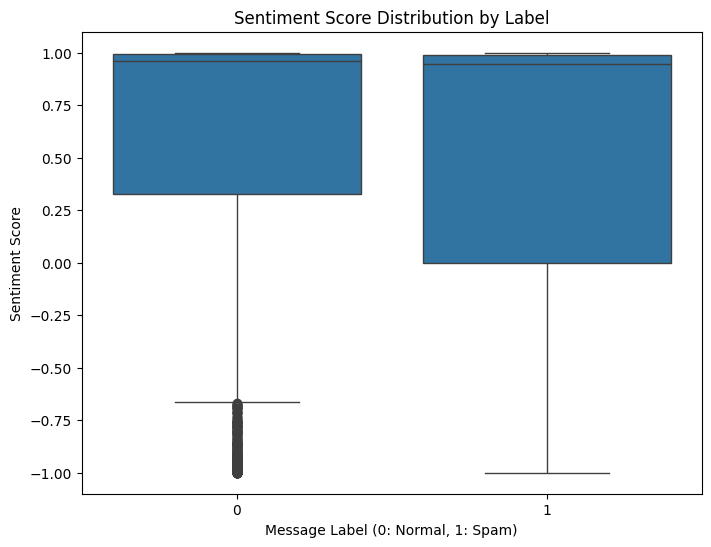

<Figure size 1200x700 with 0 Axes>

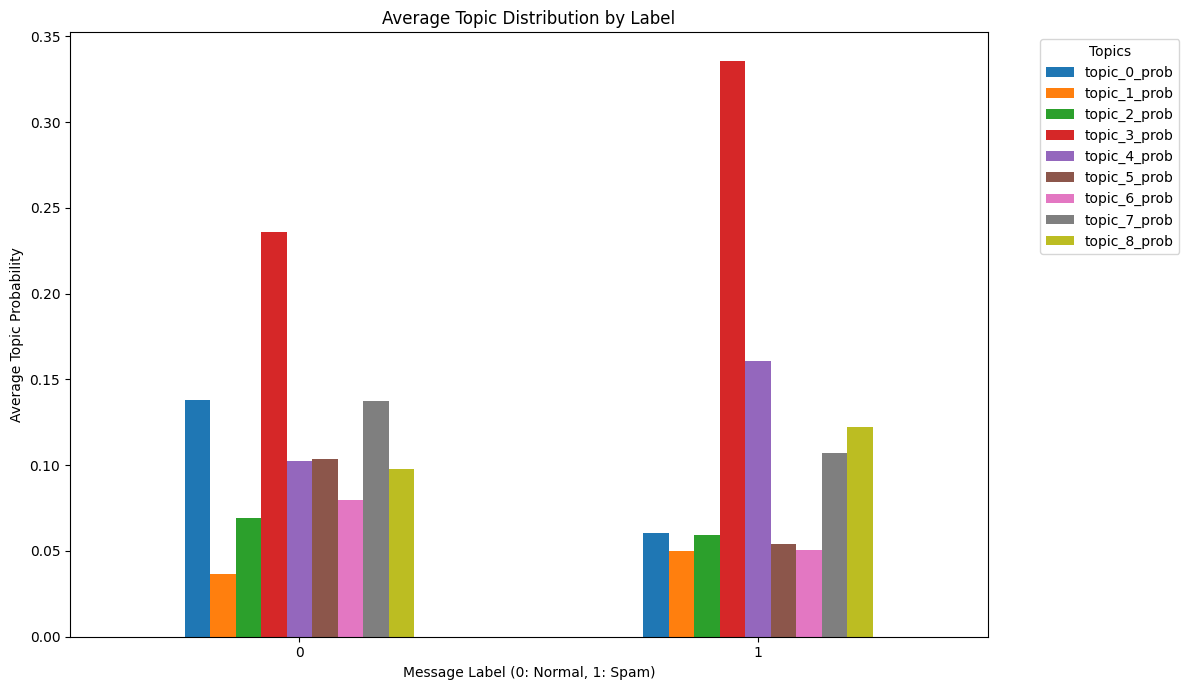

Sentiment score distribution box plot and average topic distribution bar chart displayed.


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='sentiment_score', data=df_cleaned)
plt.title('Sentiment Score Distribution by Label')
plt.xlabel('Message Label (0: Normal, 1: Spam)')
plt.ylabel('Sentiment Score')
plt.show()

average_topic_distribution_by_label_reset = average_topic_distribution_by_label.reset_index()
plt.figure(figsize=(12, 7))
average_topic_distribution_by_label_reset.plot(x='label', kind='bar', stacked=False, figsize=(12, 7))
plt.title('Average Topic Distribution by Label')
plt.xlabel('Message Label (0: Normal, 1: Spam)')
plt.ylabel('Average Topic Probability')
plt.xticks(rotation=0)
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Sentiment score distribution box plot and average topic distribution bar chart displayed.")

## Final Task

### Subtask:
Summarize the findings from both the sentiment analysis and topic modeling, highlighting the key differences in sentiment and topics between spam and normal messages based on the 'label' column.


## Summary:

### Data Analysis Key Findings

*   **Data Cleaning**: The dataset was cleaned by dropping 425 columns with over 90% missing values, resulting in a DataFrame with only 'text' and 'label' columns. Rows with missing 'label' values were also removed, leaving 4904 entries for analysis.
*   **Sentiment Analysis**:
    *   Messages labeled '0' (normal) had an average sentiment score of approximately 0.5325.
    *   Messages labeled '1' (spam) had a slightly lower average sentiment score of approximately 0.4674. This suggests normal messages tend to be slightly more positive than spam messages.
*   **Topic Modeling**:
    *   An optimal number of 9 topics was determined using coherence scores, with the highest coherence score being 0.5888.
    *   The topics identified were:
        *   **Topic 1 (Entertainment/Film):** season, series, film, episode, movie, new, character.
        *   **Topic 2 (Film Awards/Careers):** film, robert, actress, role, year, award, million, woman.
        *   **Topic 3 (Royal Family):** harry, prince, royal, meghan, markle, wedding, queen, kate.
        *   **Topic 4 (Conversational/Narrative):** said, like, time, year, love, say, life, know.
        *   **Topic 5 (Politics/Trump):** trump, said, president, people, time, state, year, new.
        *   **Topic 6 (Legal/Allegations):** said, weinstein, woman, sexual, year, say, allegation.
        *   **Topic 7 (Awards/Events):** award, best, year, winner, edit, holmes, live, team.
        *   **Topic 8 (Music Industry):** song, album, selena, justin, music, singer, bieber, gomez.
        *   **Topic 9 (Celebrity Culture/Kardashian):** kardashian, kim, jenner, baby, kylie, photo, family.
*   **Topic Distribution by Label**:
    *   **Label 0 (Normal Messages)** showed higher average probabilities for Topic 0 (Entertainment/Film, 0.1378), Topic 2 (Royal Family, 0.0692), Topic 5 (Legal/Allegations, 0.1034), Topic 6 (Awards/Events, 0.0795), and Topic 7 (Music Industry, 0.1373).
    *   **Label 1 (Spam Messages)** showed significantly higher average probabilities for Topic 1 (Film Awards/Careers, 0.0497), Topic 3 (Conversational/Narrative, 0.3354), Topic 4 (Politics/Trump, 0.1606), and Topic 8 (Celebrity Culture/Kardashian, 0.1221). Notably, Topic 3 (Conversational/Narrative) had a very high prevalence in spam messages.

### Insights or Next Steps

*   **Spam Message Characteristics**: Spam messages (label '1') are notably characterized by conversational/narrative content, political discussions (especially around Trump), and celebrity gossip (Kardashian family), alongside a slightly more neutral sentiment compared to normal messages. This suggests potential strategies for spam detection could focus on these thematic areas and less positive sentiment cues.
*   **Further Classification**: The distinct topic distributions between labels '0' and '1' indicate that topic prevalence could be a powerful feature for building a classification model to automatically distinguish between normal and spam messages.
